<a href="https://colab.research.google.com/github/jcandane/percolationwork/blob/main/percolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Percolation Network Simulation Work

Julio Candanedo

### import packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Settings and Creating the Lattice

In [15]:
N, M   = 50,50
cutoff = 0.5

shape = np.array([N,M])
q     = np.arange( np.prod(shape) ).reshape(shape, order="C")

qq = ( np.array([q[1:,:].reshape( ((N-1)*M) ), q[:-1,:].reshape( ((N-1)*M) )]) )
ww = ( np.array([q[:,1:].reshape( (N*(M-1)) ), q[:,:-1].reshape( (N*(M-1)) )]) )
IJ = np.concatenate( (qq,ww) , axis=1) ## complete rectangular-lattice-network connections

Edge = np.random.rand(len(IJ[0]))  ## data column of sparse-tensor, edge-strength
IJ   = IJ[ : , Edge < cutoff ]     ## delete edges in complete rectangular-lattice-network

## Plot without determining domains

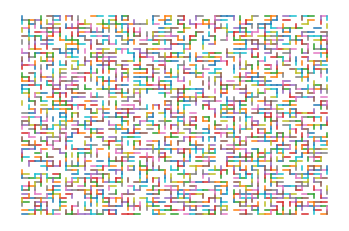

In [16]:
tuple_locations = np.asarray( np.meshgrid(np.arange(shape[0]), np.arange(shape[1]) ) ).reshape((2,np.prod(shape)), order="F").T #, sparse=True)
edges           = np.concatenate( (tuple_locations[ IJ[0] ], tuple_locations[ IJ[1] ]) , axis=1)[:,[0,2,1,3]]

cmap = plt.cm.get_cmap(name='rainbow')

### for-lopp to plot each domain
###plt.plot(tuple_locations[:,0], tuple_locations[:,1], 'ro')
plt.plot(edges[:,:2].T, edges[:,2:].T)
plt.axis('off')
plt.show()

### How to determine connectivity from graph (sparse-matrix/list of 2-tuples)??

### ⚠⚠⚠ bug in self-made algorthim (works most of the time!)

In [17]:
JKK = 1*IJ # temporary copy of index-array

i0 = np.argsort( JKK[0] )
JKK = JKK[:,i0]

domains = np.concatenate( ([0], JKK[0][1:] - JKK[0][:-1]) ) 
domains = np.cumsum( domains != 0 )

i1 = np.argsort( JKK[1] ) ## to improve searching
for i in range(len(JKK[1])):
    asd    = np.where(JKK[1][i1] == JKK[1,i])[0] ## search in coln 1 do binary search instead
    asdd   = np.where(JKK[0]     == JKK[1,i])[0] ## search in coln 1

    asddd  = np.where(JKK[0]     == JKK[0,i])[0] ## search in coln 0
    asdddd = np.where(JKK[1][i1] == JKK[0,i])[0] ## search in coln 1

    asd  = np.union1d( i1[asd],asdd )
    asd  = np.union1d( asd,asddd )
    #asd  = np.union1d( asd, asdddd )
    asd  = np.union1d( asd,i1[ asdddd ] )#asdddd ) ##  

    domains[asd] = np.amin(domains[asd]) #domains[asd[0]] ## search domains and change all...

for j in range(len(JKK[1])): ## double scan to avoid noncausal stuff
    i = len(JKK[1])-1 - j
    asd    = np.where(JKK[1][i1] == JKK[1,i])[0] ## search in coln 1 do binary search instead
    asdd   = np.where(JKK[0]     == JKK[1,i])[0] ## search in coln 1

    asddd  = np.where(JKK[0]     == JKK[0,i])[0] ## search in coln 0
    asdddd = np.where(JKK[1][i1] == JKK[0,i])[0] ## search in coln 1

    asd  = np.union1d( i1[asd],asdd )
    asd  = np.union1d( asd,asddd )
    #asd  = np.union1d( asd, asdddd )
    asd  = np.union1d( asd,i1[ asdddd ] )#asdddd ) ##  

    domains[asd] = np.amin(domains[asd]) #domains[asd[0]] ## search domains and change all...
    
    #print(domains)

print("Number of Connected Components = " + str(len(np.unique(domains))))
print(np.concatenate(([domains], JKK), axis=0)) ## first row is the domains, next two-rows are JK (graph index)

idomains = np.argsort( domains )
D = domains[idomains]
D = np.where( D[1:] - D[:-1] != 0)[0] + 1 ## np.diff
D = np.concatenate( ([0], D, [len(domains)]) )

Number of Connected Components = 128
[[   0    0    2 ... 1821 1783 1783]
 [   3    4    7 ... 2497 2499 2499]
 [   2    3    6 ... 2496 2449 2498]]


## Using the Connectivity, Plot Domains (groups of edges which are connected) with colors

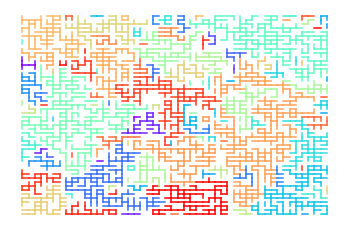

In [18]:
edges = np.concatenate( (tuple_locations[ IJ[0] ], tuple_locations[ IJ[1] ]) , axis=1)[:,[0,2,1,3]]
cmap  = plt.cm.get_cmap(name='rainbow')

### for-lopp to plot each domain
##plt.plot(tuple_locations[:,0], tuple_locations[:,1], 'ro') ### to plot vertices
for i in range(len(D)-1):
    indexes = i0[ idomains[ np.arange(D[i],D[i+1]) ] ]
    plt.plot(edges[indexes,:][:,:2].T, edges[indexes][:,2:].T, color=cmap(np.random.randint(256)))
plt.axis('off')
plt.show()